The Autoregressive (AR) model is a fundamental time series analysis technique that predicts future values based on a linear combination of past observations. The key principles are:

1. Linear Dependency: AR models assume that current values can be expressed as a linear function of previous values plus some random error (white noise)

2. Order (p): The number of lagged observations used in the model. An AR(p) model uses p previous values to predict the current value

3. Stationarity: AR models typically require the time series to be stationary, meaning its statistical properties (mean, variance) are constant over time

4. Mathematical Form: The general form of an AR(p) model is:
   X_t = c + φ₁X_{t-1} + φ₂X_{t-2} + ... + φ_pX_{t-p} + ε_t
   where:
   - X_t is the current value
   - c is a constant
   - φ₁...φ_p are model parameters
   - ε_t is white noise

AR models are widely used in forecasting financial time series, economic indicators, and other temporal data where there is a dependency on past values.





YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, an

Mean Squared Error: 465.08


<Axes: title={'center': 'Apple AR Strategy Cumulative Returns'}, xlabel='Date'>

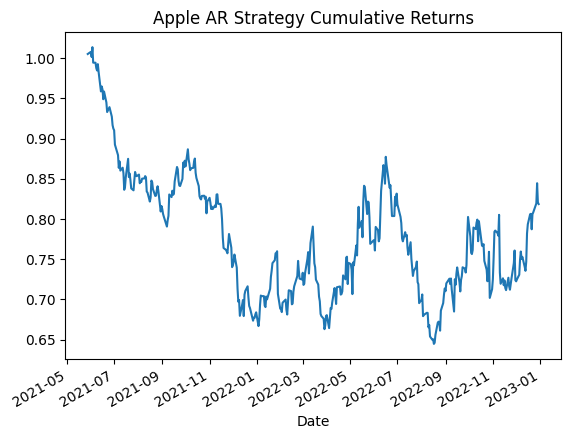

In [1]:
# AR Strategy for Apple
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Download Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
# data = data.asfreq('D', method='pad')
prices = data['Close']

# Split into train and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit AR model
window = 5  # Use 5 previous days as predictors
model = AutoReg(train, lags=window)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Evaluate model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

# Create trading signals
signals = pd.DataFrame(index=test.index)
signals['price'] = test
signals['prediction'] = predictions
signals['signal'] = np.where(signals['prediction'] > signals['price'], 1, -1)

# Backtest strategy
signals['returns'] = signals['price'].pct_change()
signals['strategy_returns'] = signals['signal'].shift(1) * signals['returns']
signals['cumulative_returns'] = (1 + signals['strategy_returns']).cumprod()

# Plot results
signals['cumulative_returns'].plot(title='Apple AR Strategy Cumulative Returns')


[*********************100%***********************]  1 of 1 completed


/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

ARMA Mean Squared Error: 0.00


/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: title={'center': '{ticker} ARMA Strategy Cumulative Returns'}, xlabel='Date'>

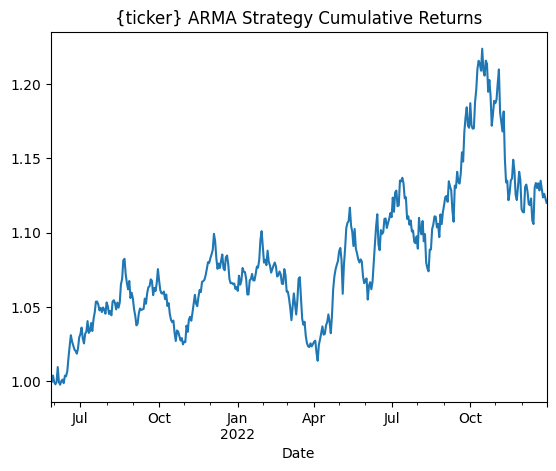

In [8]:
# ARMA Strategy for AUD/USD
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Download AUD/USD data
ticker = 'AUDUSD=X'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
prices = data['Close']

# Split into train and test sets
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]

# Fit ARMA model (ARIMA(p,0,q))
arma_model = ARIMA(train, order=(2, 0, 1))  # AR(2) and MA(1)
arma_fit = arma_model.fit()

# Make predictions
arma_predictions = arma_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Evaluate model
arma_mse = mean_squared_error(test, arma_predictions)
print(f'ARMA Mean Squared Error: {arma_mse:.2f}')

# Create trading signals
arma_signals = pd.DataFrame(index=test.index)
arma_signals['price'] = test
arma_signals['prediction'] = arma_predictions
arma_signals['signal'] = np.where(arma_signals['prediction'] > arma_signals['price'], 1, -1)

# Backtest strategy
arma_signals['returns'] = arma_signals['price'].pct_change()
arma_signals['strategy_returns'] = arma_signals['signal'].shift(1) * arma_signals['returns']
arma_signals['cumulative_returns'] = (1 + arma_signals['strategy_returns']).cumprod()

# Plot results
arma_signals['cumulative_returns'].plot(title='{ticker} ARMA Strategy Cumulative Returns')


# Vector Autoregression (VAR) Algorithm

Vector Autoregression (VAR) is a multivariate time series model that extends the univariate autoregressive (AR) model to capture linear interdependencies among multiple time series. The key features of VAR include:

1. **Multivariate Analysis**: VAR models multiple time series simultaneously, capturing relationships between variables.

2. **Mathematical Representation**: A VAR(p) model with k variables can be written as:
   Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + ... + A_p Y_{t-p} + ε_t
   where:
   - Y_t is a k×1 vector of variables at time t
   - c is a k×1 vector of constants
   - A_i are k×k matrices of coefficients
   - ε_t is a k×1 vector of error terms

3. **Implementation Steps**:
   - Test for stationarity and transform data if needed
   - Determine optimal lag order using information criteria (AIC, BIC)
   - Estimate model parameters
   - Validate model with diagnostic tests
   - Generate forecasts

4. **Applications**: VAR is particularly useful for financial time series where multiple assets or economic indicators influence each other, such as currency pairs, stock prices, or macroeconomic variables.

5. **Advantages**: Captures complex dynamics and interdependencies between variables without requiring structural economic theory.

In our implementation, we use VAR to model relationships between multiple currency pairs, generating trading signals based on the predicted movements.


[*********************100%***********************]  3 of 3 completed


/opt/quantfree/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


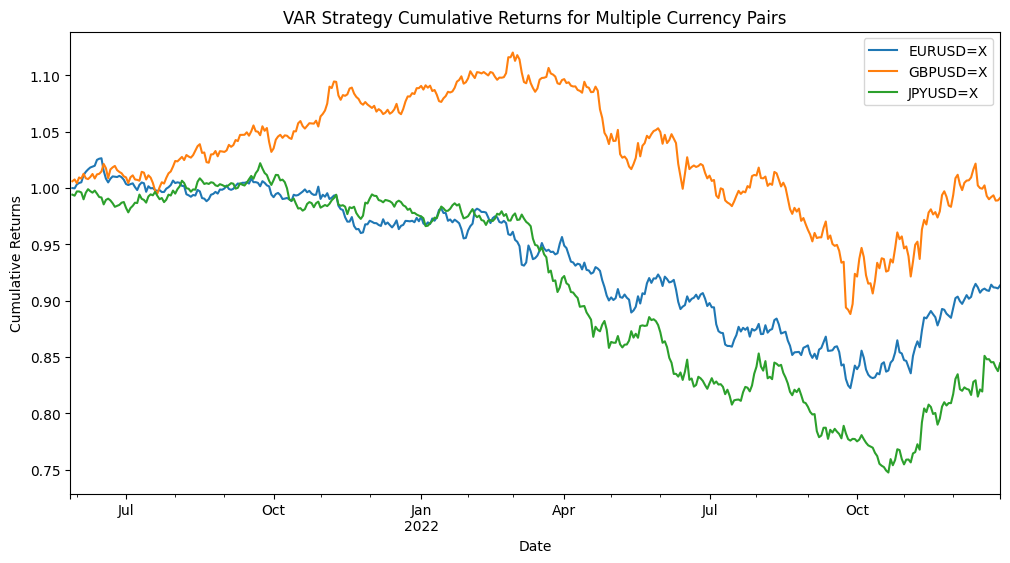

In [12]:
# VAR Strategy for Multiple Currency Pairs with Error Handling
from statsmodels.tsa.api import VAR
import yfinance as yf
import matplotlib.pyplot as plt  # 添加这行

# Download multiple currency pairs data
tickers = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X']
data = yf.download(tickers, start='2015-01-01', end='2023-01-01')['Close']

data = data.dropna()  # 删除缺失值
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # 处理无穷值

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit VAR model
var_model = VAR(train)
var_fit = var_model.fit(maxlags=2)  # Using 2 lags

# Make predictions
var_predictions = var_fit.forecast(train.values[-var_fit.k_ar:], steps=len(test))

# Convert predictions to DataFrame
var_predictions = pd.DataFrame(var_predictions, index=test.index, columns=test.columns)

# Create trading signals for each currency pair
var_signals = pd.DataFrame(index=test.index)
for ticker in tickers:
    var_signals[f'{ticker}_price'] = test[ticker]
    var_signals[f'{ticker}_prediction'] = var_predictions[ticker]
    var_signals[f'{ticker}_signal'] = np.where(
        var_signals[f'{ticker}_prediction'] > var_signals[f'{ticker}_price'], 1, -1)

# Backtest strategy for each currency pair
for ticker in tickers:
    var_signals[f'{ticker}_returns'] = var_signals[f'{ticker}_price'].pct_change()
    var_signals[f'{ticker}_strategy_returns'] = (
        var_signals[f'{ticker}_signal'].shift(1) * var_signals[f'{ticker}_returns'])
    var_signals[f'{ticker}_cumulative_returns'] = (
        1 + var_signals[f'{ticker}_strategy_returns']).cumprod()

# Plot results for each currency pair
plt.figure(figsize=(12, 6))
for ticker in tickers:
    var_signals[f'{ticker}_cumulative_returns'].plot(label=ticker)
plt.title('VAR Strategy Cumulative Returns for Multiple Currency Pairs')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()





The Hurst Exponent (H) measures long-term memory in time series using the relationship between variance and time scale. For a time series $X_t$:

$$H = \frac{\log(R/S)}{\log(\tau)}$$
where $R/S = \frac{\max(X_t) - \min(X_t)}{\sigma(X_t)}$ for $t \in [1,\tau]$

The Variance Ratio Test (VR) compares variance across different time intervals. For a series $X_t$ with $n$ observations and lag $k$:

$$VR(k) = \frac{\text{Var}(X_t - X_{t-k})}{k \cdot \text{Var}(X_t - X_{t-1})}$$
For a random walk, $VR(k) \approx 1$. If $VR(k) < 1$ suggests mean-reversion, while $VR(k) > 1$ indicates trending behavior.


The Hurst Exponent (H) measures long-term memory in time series using the relationship between variance and time scale. For a time series X_t, it's calculated as:

H = slope of log(τ) vs log(R/S)
where R/S = (max(X_t) - min(X_t)) / std(X_t) for t ∈ [1,τ]

The Variance Ratio Test (VR) compares variance across different time intervals. For a series X_t with n observations and lag k, it's computed as:

VR(k) = Var(X_t - X_{t-k}) / (k * Var(X_t - X_{t-1})) 

where Var() is the sample variance. For a random walk, VR(k) ≈ 1. If VR(k) < 1, it suggests mean-reversion, and VR(k) > 1 indicates trending behavior.
End of Selection



[*********************100%***********************]  3 of 3 completed


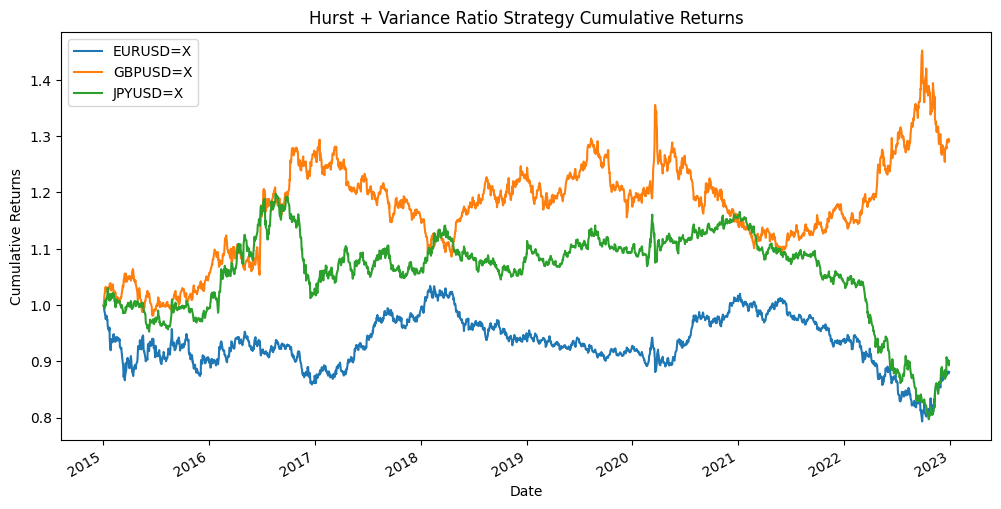

In [3]:

# VAR Strategy for Multiple Currency Pairs with Error Handling
from statsmodels.tsa.api import VAR
import yfinance as yf
import matplotlib.pyplot as plt  # 添加这行

# Download multiple currency pairs data
tickers = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X']
data = yf.download(tickers, start='2015-01-01', end='2023-01-01')['Close']

data = data.dropna()  # 删除缺失值
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # 处理无穷值

# Calculate Hurst Exponent and Variance Ratio for each currency pair
def hurst_exponent(ts):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, 100)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0]

# The hurst_exponent function calculates the Hurst exponent for a time series.
# The Hurst exponent is a measure of the long-term memory of a time series and indicates:
# - H ≈ 0.5: Random walk (no memory, uncorrelated)
# - 0 < H < 0.5: Mean-reverting (anti-persistent) behavior
# - 0.5 < H < 1: Trending (persistent) behavior
#
# The calculation works by:
# 1. Creating a range of lag values (2 to 99)
# 2. For each lag, calculating the standard deviation of the differenced series
# 3. Fitting a line to the log-log plot of lags vs. standard deviations
# 4. The slope of this line is the Hurst exponent
#
# The theoretical basis comes from the property that for a random walk:
#   std(X_t+τ - X_t) ∝ τ^H
# where H = 0.5 for a true random walk

def variance_ratio(ts, lag=2):
    """Returns the variance ratio test statistic"""
    n = len(ts)
    mu = np.mean(np.diff(ts))
    m = (n - lag + 1) * (1 - lag/n)
    b = np.sum((ts[lag:] - ts[:-lag] - lag*mu)**2) / m
    a = np.sum((ts[1:] - ts[:-1] - mu)**2) / (n-1)
    return b / (lag*a)

# Create signals based on mean-reversion (Hurst < 0.5) or trend-following (Hurst > 0.5)
hurst_signals = pd.DataFrame(index=data.index)
for ticker in tickers:
    # Calculate rolling Hurst and Variance Ratio
    hurst_values = data[ticker].rolling(window=60).apply(hurst_exponent)
    vr_values = data[ticker].rolling(window=60).apply(variance_ratio)
    
    # Generate signals
    hurst_signals[f'{ticker}_price'] = data[ticker]
    hurst_signals[f'{ticker}_hurst'] = hurst_values
    hurst_signals[f'{ticker}_vr'] = vr_values
    
    # Mean-reversion strategy when Hurst < 0.5 and VR < 1
    hurst_signals[f'{ticker}_signal'] = np.where(
        (hurst_signals[f'{ticker}_hurst'] < 0.5) & (hurst_signals[f'{ticker}_vr'] < 1),
        -np.sign(hurst_signals[f'{ticker}_price'].diff()),
        1)
    
    # Trend-following strategy when Hurst > 0.5 and VR > 1
    hurst_signals[f'{ticker}_signal'] = np.where(
        (hurst_signals[f'{ticker}_hurst'] > 0.5) & (hurst_signals[f'{ticker}_vr'] > 1),
        np.sign(hurst_signals[f'{ticker}_price'].diff()),
        hurst_signals[f'{ticker}_signal'])

# Backtest strategy for each currency pair
for ticker in tickers:
    hurst_signals[f'{ticker}_returns'] = hurst_signals[f'{ticker}_price'].pct_change()
    hurst_signals[f'{ticker}_strategy_returns'] = (
        hurst_signals[f'{ticker}_signal'].shift(1) * hurst_signals[f'{ticker}_returns'])
    hurst_signals[f'{ticker}_cumulative_returns'] = (
        1 + hurst_signals[f'{ticker}_strategy_returns']).cumprod()

# Plot results
plt.figure(figsize=(12, 6))
for ticker in tickers:
    hurst_signals[f'{ticker}_cumulative_returns'].plot(label=ticker)
plt.title('Hurst + Variance Ratio Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


# Hurst Exponent with p=2 (Quadratic Variation)

The Hurst exponent (H) measures the long-term memory or persistence in a time series.
When using p=2, we analyze the scaling of quadratic variations: E[|X_{t+τ} - X_t|^2] ~ τ^(2H)

For a time series X_t, the p=2 Hurst exponent examines how the mean squared differences
scale with increasing time intervals (τ). Mathematically, we estimate H by finding the slope
of log(E[|X_{t+τ} - X_t|^2]) vs log(τ) and dividing by 2.

Interpretation:
- H < 0.5: Mean-reverting series (anti-persistent) - large changes tend to be followed by reversals
- H = 0.5: Random walk (Brownian motion) - changes are independent
- H > 0.5: Trend-following series (persistent) - trends tend to continue

The p=2 version is particularly useful in financial time series analysis as it relates
directly to volatility scaling and provides insights into market efficiency.


# The Xt model for mean reversion when VR(k) < 1 (shorter-term volatility exceeds longer-term) is:

Xt = μ + ρ(Xt-1 - μ) + εt

where:
- μ is the long-term mean
- ρ is the mean reversion parameter (0 < ρ < 1)
- εt ~ N(0, σ²) is the random shock

VR(k) < 1 indicates mean reversion because:
E[(Xt - Xt-k)²] = σ²(1 - ρ^k)/(1 - ρ)
For small k, this variance exceeds the random walk variance (kσ²), resulting in VR(k) = (1 - ρ^k)/(k(1 - ρ)) < 1







YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


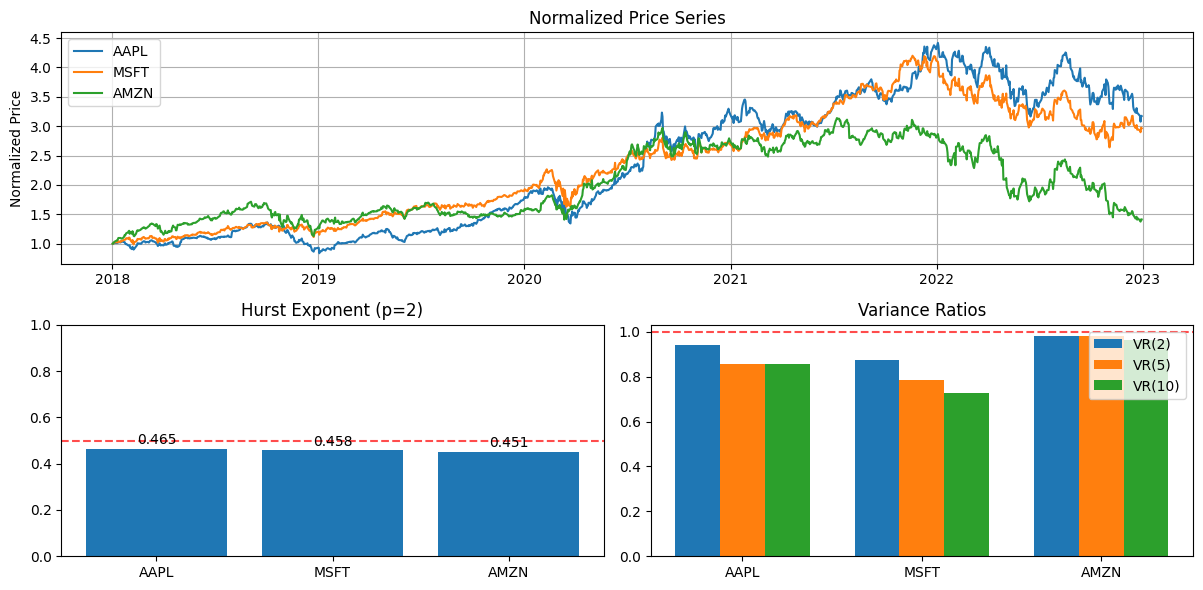


Hurst Exponent (p=2) and Variance Ratio Analysis:
     Hurst (p=2)     VR(2)     VR(5)    VR(10) Interpretation
AAPL    0.464829  0.943159   0.85488  0.857713    Random walk
MSFT    0.458105  0.875947  0.783689  0.726595    Random walk
AMZN    0.450891  0.981681  0.980561  0.961967    Random walk


In [1]:
# Hurst Exponent and Variance Ratio Analysis
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Download data for analysis
tickers = ['AAPL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Close']

# Calculate Hurst Exponent with p=2 (quadratic variation)
def hurst_exponent_p2(ts, max_lag=100):
    """
    Calculate the Hurst exponent using p=2 (quadratic variation)
    For a time series X_t, we measure E[|X_{t+τ} - X_t|^2] across different lags τ
    H is the slope of log(τ) vs log(E[|X_{t+τ} - X_t|^2])
    
    Parameters:
    -----------
    ts : array-like
        Time series data
    max_lag : int
        Maximum lag to consider
        
    Returns:
    --------
    float
        Hurst exponent
    """
    # Convert to numpy array if needed
    ts = np.asarray(ts)
    
    # Use lags from 2 to max_lag
    lags = range(2, min(max_lag, len(ts)//4))
    
    # Calculate quadratic variations for different lags
    # E[|X_{t+τ} - X_t|^2] is estimated by the mean squared difference
    tau = [np.mean(np.square(ts[lag:] - ts[:-lag])) for lag in lags]
    
    # The Hurst exponent is H = 1/2 * slope
    # For a random walk, E[|X_{t+τ} - X_t|^2] ∝ τ, so H = 0.5
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    
    # Return H = slope/2 (because we're using squared differences)
    return poly[0]/2

def variance_ratio(ts, lag=2):
    """
    Calculate the variance ratio test statistic
    VR(k) = Var(X_t - X_{t-k}) / (k * Var(X_t - X_{t-1}))
    
    Parameters:
    -----------
    ts : array-like
        Time series data
    lag : int
        Lag to use for the test
        
    Returns:
    --------
    float
        Variance ratio
    """
    ts = np.asarray(ts)
    n = len(ts)
    
    # Calculate mean of first differences
    mu = np.mean(np.diff(ts))
    
    # Calculate long-period variance (numerator)
    m = (n - lag + 1) * (1 - lag/n)  # Adjustment for sample size
    b = np.sum((ts[lag:] - ts[:-lag] - lag*mu)**2) / m
    
    # Calculate short-period variance (denominator)
    a = np.sum((ts[1:] - ts[:-1] - mu)**2) / (n-1)
    
    # Return variance ratio
    return b / (lag*a)

# Calculate Hurst exponent and variance ratio for each ticker
results = {}
for ticker in tickers:
    # Skip if ticker has NaN values
    if data[ticker].isnull().any():
        continue
        
    # Calculate Hurst exponent with p=2
    hurst = hurst_exponent_p2(data[ticker].values)
    
    # Calculate variance ratios for different lags
    vr_2 = variance_ratio(data[ticker].values, lag=2)
    vr_5 = variance_ratio(data[ticker].values, lag=5)
    vr_10 = variance_ratio(data[ticker].values, lag=10)
    
    results[ticker] = {
        'Hurst (p=2)': hurst,
        'VR(2)': vr_2,
        'VR(5)': vr_5,
        'VR(10)': vr_10,
        'Interpretation': 'Mean-reverting' if hurst < 0.45 else 'Random walk' if 0.45 <= hurst <= 0.55 else 'Trending'
    }

# Create a figure with subplots
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, figure=fig)

# Plot 1: Price series
ax1 = fig.add_subplot(gs[0, :])
for ticker in tickers:
    if ticker in results:
        ax1.plot(data[ticker]/data[ticker].iloc[0], label=f"{ticker}")
ax1.set_title('Normalized Price Series')
ax1.set_ylabel('Normalized Price')
ax1.legend()
ax1.grid(True)

# Plot 2: Hurst exponent visualization
ax2 = fig.add_subplot(gs[1, 0])
tickers_with_results = [t for t in tickers if t in results]
hurst_values = [results[t]['Hurst (p=2)'] for t in tickers_with_results]
ax2.bar(tickers_with_results, hurst_values)
ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
ax2.set_title('Hurst Exponent (p=2)')
ax2.set_ylim(0, 1)
for i, v in enumerate(hurst_values):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center')

# Plot 3: Variance ratios
ax3 = fig.add_subplot(gs[1, 1])
x = np.arange(len(tickers_with_results))
width = 0.25
vr2_values = [results[t]['VR(2)'] for t in tickers_with_results]
vr5_values = [results[t]['VR(5)'] for t in tickers_with_results]
vr10_values = [results[t]['VR(10)'] for t in tickers_with_results]

ax3.bar(x - width, vr2_values, width, label='VR(2)')
ax3.bar(x, vr5_values, width, label='VR(5)')
ax3.bar(x + width, vr10_values, width, label='VR(10)')
ax3.axhline(y=1, color='r', linestyle='--', alpha=0.7)
ax3.set_title('Variance Ratios')
ax3.set_xticks(x)
ax3.set_xticklabels(tickers_with_results)
ax3.legend()

plt.tight_layout()
plt.show()

# Print results table
results_df = pd.DataFrame(results).T
print("\nHurst Exponent (p=2) and Variance Ratio Analysis:")
print(results_df)


[*********************100%***********************]  3 of 3 completed


Implementing Hurst Exponent (p=2) Trading Strategy
Applying Hurst trading strategy to AAPL...



/tmp/ipykernel_119566/193394706.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.033578562701083614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]


Applying Hurst trading strategy to MSFT...


/tmp/ipykernel_119566/193394706.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.020372140235017655' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]


Applying Hurst trading strategy to AMZN...


/tmp/ipykernel_119566/193394706.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.007380856462852581' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]


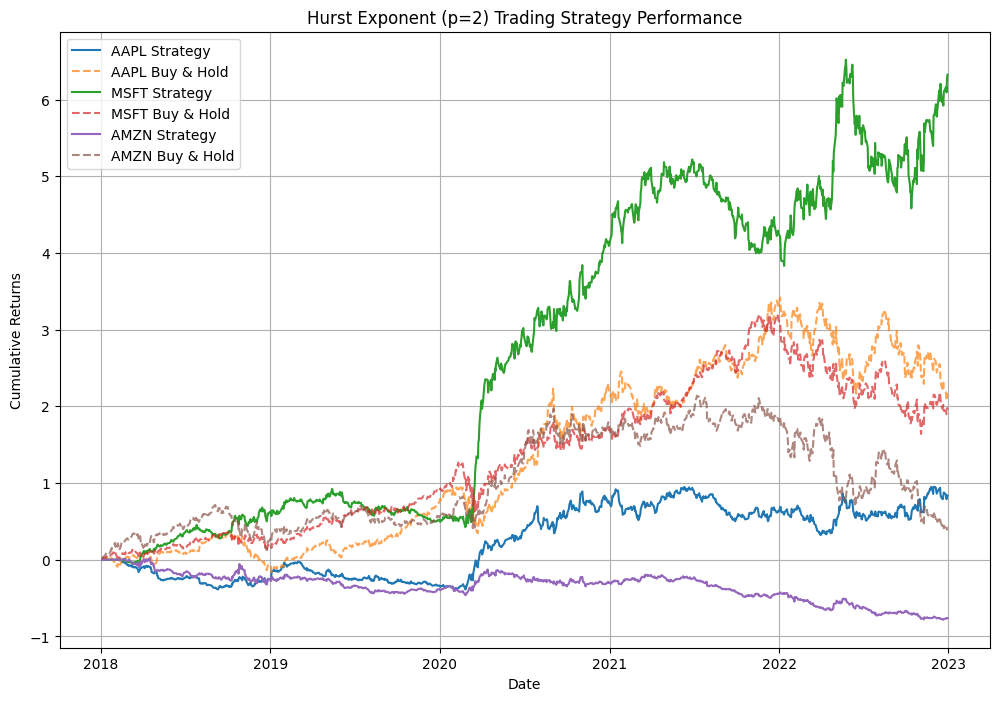


Strategy Performance Metrics:
  Ticker Strategy Return Buy & Hold Return Strategy Sharpe Buy & Hold Sharpe  \
0   AAPL          83.50%           217.29%            0.53              0.86   
1   MSFT         632.46%           196.29%            1.46              0.86   
2   AMZN         -76.09%            41.29%           -0.63              0.37   

  Max Drawdown (Strategy) Max Drawdown (Buy & Hold)  
0                 -39.06%                   -38.52%  
1                 -25.98%                   -37.15%  
2                 -78.59%                   -56.15%  


In [2]:
# Hurst Exponent Trading Strategy
print("\nImplementing Hurst Exponent (p=2) Trading Strategy")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Download data for analysis
tickers = ['AAPL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Close']


def hurst_trading_strategy(ticker, data, lookback=30, threshold=0.5):
    """
    Implement a trading strategy based on Hurst exponent:
    - H > 0.5: Trending market (follow the trend)
    - H < 0.5: Mean-reverting market (contrarian approach)
    - H ≈ 0.5: Random walk (no clear signal)
    
    Parameters:
    -----------
    ticker : str
        Ticker symbol
    data : pandas.DataFrame
        Price data for the ticker
    lookback : int
        Period for calculating Hurst exponent
    threshold : float
        Threshold to determine if market is trending or mean-reverting
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with signals and strategy returns
    """
    prices = data[ticker].copy()
    returns = prices.pct_change().dropna()
    
    # Initialize results
    strategy_df = pd.DataFrame(index=returns.index)
    strategy_df['returns'] = returns
    strategy_df['hurst'] = np.nan
    strategy_df['signal'] = 0
    strategy_df['strategy_returns'] = 0
    
    # Calculate rolling Hurst exponent
    for i in range(lookback, len(returns)):
        # Get the window of returns
        window = returns.iloc[i-lookback:i].values
        
        # Calculate Hurst exponent for the window
        try:
            # Calculate log returns
            log_returns = np.log(1 + window)
            
            # Calculate the variance of the log returns
            var = np.var(log_returns)
            
            # Calculate the variance of differences at different lags
            lags = range(2, min(11, lookback//2))
            variances = []
            
            for lag in lags:
                # Calculate differences at the given lag
                lagged_diff = log_returns[lag:] - log_returns[:-lag]
                # Calculate variance of the differences
                variances.append(np.var(lagged_diff) / lag)
            
            # Calculate the average variance ratio
            avg_variance_ratio = np.mean(np.array(variances) / var)
            
            # Calculate Hurst exponent (p=2)
            hurst = 0.5 * np.log(avg_variance_ratio) / np.log(2)
            
            strategy_df.iloc[i, strategy_df.columns.get_loc('hurst')] = hurst
            
            # Generate trading signal based on Hurst exponent
            if hurst > threshold + 0.05:  # Trending market
                # Follow the trend: buy if previous return is positive, sell if negative
                signal = 1 if returns.iloc[i-1] > 0 else -1
            elif hurst < threshold - 0.05:  # Mean-reverting market
                # Contrarian approach: buy if previous return is negative, sell if positive
                signal = -1 if returns.iloc[i-1] > 0 else 1
            else:  # Random walk, no clear signal
                signal = 0
                
            strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] = signal
            
            # Calculate strategy returns
            strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = signal * returns.iloc[i]
            
        except Exception as e:
            print(f"Error calculating Hurst exponent at index {i}: {e}")
    
    # Calculate cumulative returns
    strategy_df['cum_returns'] = (1 + strategy_df['returns']).cumprod() - 1
    strategy_df['cum_strategy_returns'] = (1 + strategy_df['strategy_returns']).cumprod() - 1
    
    return strategy_df

# Apply the strategy to each ticker
hurst_strategy_results = {}
for ticker in tickers:
    if ticker in data:
        print(f"Applying Hurst trading strategy to {ticker}...")
        hurst_strategy_results[ticker] = hurst_trading_strategy(ticker, data)

# Plot the results
plt.figure(figsize=(12, 8))
for ticker, strategy_df in hurst_strategy_results.items():
    plt.plot(strategy_df['cum_strategy_returns'], label=f"{ticker} Strategy")
    plt.plot(strategy_df['cum_returns'], label=f"{ticker} Buy & Hold", linestyle='--', alpha=0.7)

plt.title('Hurst Exponent (p=2) Trading Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
print("\nStrategy Performance Metrics:")
metrics_df = pd.DataFrame(columns=['Ticker', 'Strategy Return', 'Buy & Hold Return', 
                                  'Strategy Sharpe', 'Buy & Hold Sharpe', 
                                  'Max Drawdown (Strategy)', 'Max Drawdown (Buy & Hold)'])

for i, (ticker, strategy_df) in enumerate(hurst_strategy_results.items()):
    # Calculate returns
    strategy_return = strategy_df['cum_strategy_returns'].iloc[-1]
    buy_hold_return = strategy_df['cum_returns'].iloc[-1]
    
    # Calculate Sharpe ratio (assuming 252 trading days per year)
    strategy_sharpe = np.sqrt(252) * strategy_df['strategy_returns'].mean() / strategy_df['strategy_returns'].std()
    buy_hold_sharpe = np.sqrt(252) * strategy_df['returns'].mean() / strategy_df['returns'].std()
    
    # Calculate maximum drawdown
    strategy_cum_returns = (1 + strategy_df['strategy_returns']).cumprod()
    buy_hold_cum_returns = (1 + strategy_df['returns']).cumprod()
    
    strategy_max_drawdown = (strategy_cum_returns / strategy_cum_returns.cummax() - 1).min()
    buy_hold_max_drawdown = (buy_hold_cum_returns / buy_hold_cum_returns.cummax() - 1).min()
    
    metrics_df.loc[i] = [ticker, 
                        f"{strategy_return:.2%}", 
                        f"{buy_hold_return:.2%}",
                        f"{strategy_sharpe:.2f}", 
                        f"{buy_hold_sharpe:.2f}",
                        f"{strategy_max_drawdown:.2%}", 
                        f"{buy_hold_max_drawdown:.2%}"]

print(metrics_df)


Running Hurst strategy for AAPL...


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_354795/1498124127.py:321: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.004317960849055336' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.loc[data.index[i], 'strategy_returns'] = (


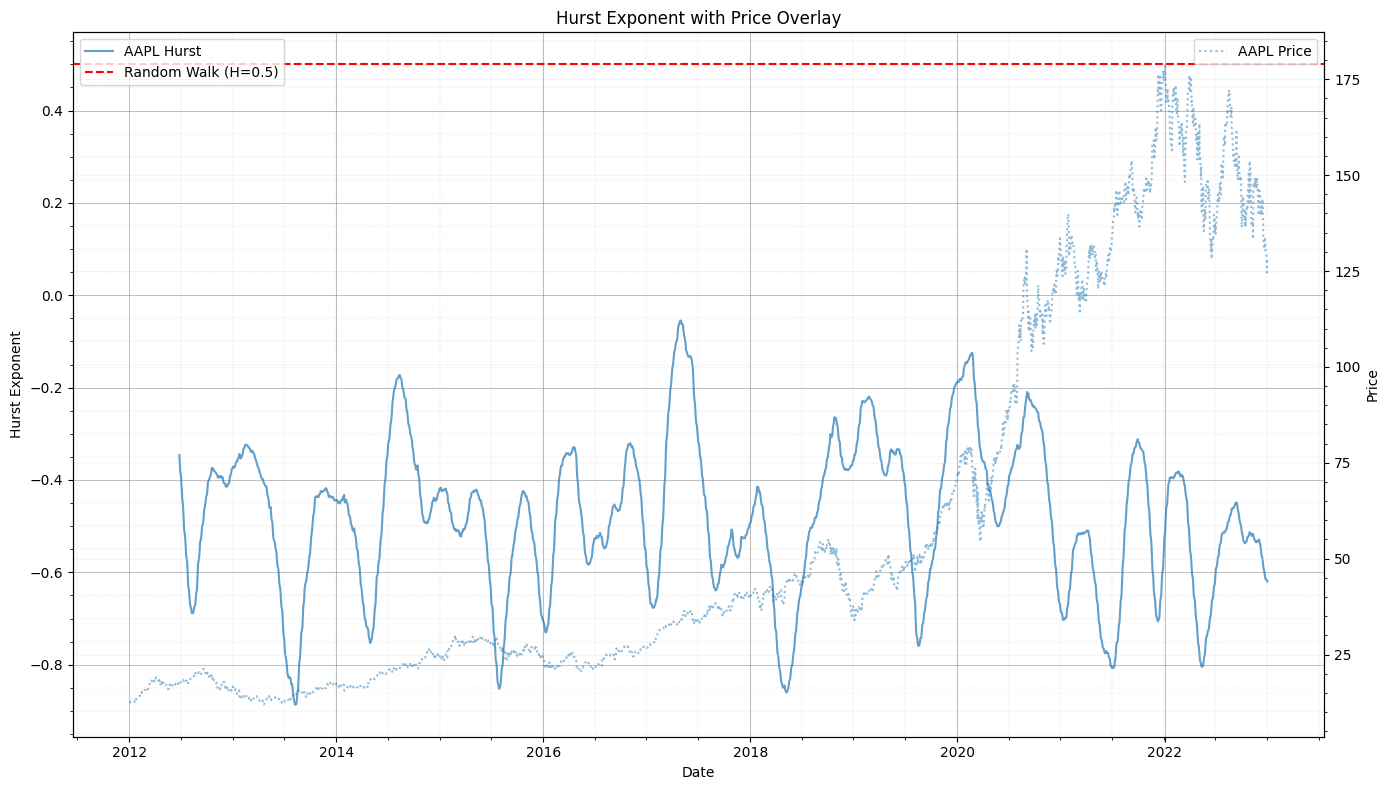

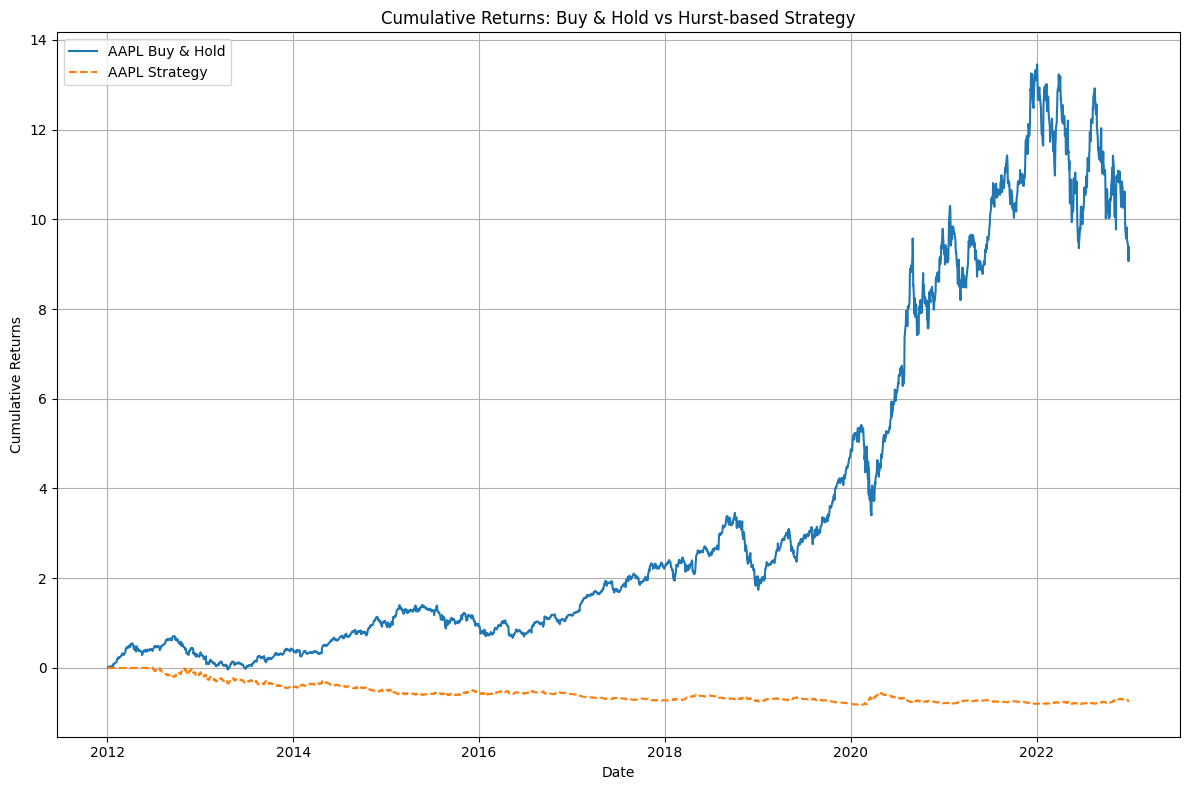

Performance Summary:
------------------------------------------------------------
Ticker     Strategy Return      Buy & Hold Return    Outperformance  sharpe_buy_hold sharpe_strategy
------------------------------------------------------------
AAPL       -72.77% 937.84% -1,010.61% 0.8780631847820893 -0.27423687131926344


In [3]:
# Implement a Hurst Exponent Trading Strategy
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


def plot_hurst_with_price(hurst_strategy_results, price_data=None, tickers=None):
    """
    Plots Hurst exponent with corresponding close prices on right axis, with enhanced grid.
    
    Args:
        hurst_strategy_results: Dictionary of DataFrames containing 'hurst' values
        price_data: Dictionary of price DataFrames (if None, uses strategy_df['Close'])
        tickers: List of tickers to plot (if None, plots all available)
    """
    if tickers is None:
        tickers = list(hurst_strategy_results.keys())
    
    # Create figure and primary axis (for Hurst)
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Plot Hurst exponents on primary axis
    colors = plt.cm.tab10(np.linspace(0, 1, len(tickers)))
    for (ticker, strategy_df), color in zip(hurst_strategy_results.items(), colors):
        if ticker not in tickers:
            continue
        ax1.plot(strategy_df['hurst'].dropna(), 
                color=color, 
                alpha=0.7, 
                label=f"{ticker} Hurst")
    
    # Hurst plot formatting
    ax1.set_title('Hurst Exponent with Price Overlay')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Hurst Exponent', color='k')
    ax1.axhline(y=0.5, color='r', linestyle='--', label='Random Walk (H=0.5)')
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax1.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.5)  # Major y-grid
    ax1.grid(True, which='minor', axis='y', color='gray', linestyle=':', linewidth=0.2)  # Minor y-grid
    ax1.grid(True, which='major', axis='x', color='gray', linestyle='-', linewidth=0.5)  # Major x-grid
    ax1.grid(True, which='minor', axis='x', color='gray', linestyle=':', linewidth=0.2)  # Minor x-grid
    ax1.legend(loc='upper left')
    ax1.minorticks_on()  # Enable minor ticks
    
    # Create secondary axis for prices
    ax2 = ax1.twinx()
    
    # Plot prices on secondary axis
    for (ticker, strategy_df), color in zip(hurst_strategy_results.items(), colors):
        if ticker not in tickers:
            continue
        price_series = price_data[ticker]['Close'] if price_data is not None else strategy_df['Close']
        ax2.plot(price_series, color=color, linestyle=':', alpha=0.5, label=f"{ticker} Price")
    
    # Price plot formatting
    ax2.set_ylabel('Price', color='k')
    ax2.legend(loc='upper right')
    ax2.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.3)
    ax2.grid(True, which='major', axis='y', color='lightgray', linestyle='-', linewidth=0.5)  # Major y-grid
    ax2.grid(True, which='minor', axis='y', color='lightgray', linestyle=':', linewidth=0.2)  # Minor y-grid
    ax2.grid(False, which='major', axis='x')  # Remove x-grid on price axis
    ax2.minorticks_on()  # Enable minor ticks
    
    plt.tight_layout()
    plt.show()


def calculate_hurst_exponent(time_series, max_lag=100, P=2):
    """
    Calculate the Hurst Exponent of a time series with variance scaling exponent P
    
    Parameters:
    time_series (array): Time series for which to calculate Hurst exponent
    max_lag (int): Maximum lag to consider
    P (int): Power factor for variance calculation (default=1, standard Hurst)
                P=2 uses squared differences (variance of returns)
    
    Returns:
    float: Hurst exponent
    """
    # Convert to numpy array if it's not already
    time_series = np.array(time_series)
    
    # Calculate the array of the variances of the lagged differences
    lags = range(2, min(max_lag+1, len(time_series)//2))
    
    # Calculate the variance of the differences using power P
    tau = []
    for lag in lags:
        # Calculate the differences
        diff = np.subtract(time_series[lag:], time_series[:-lag])
        if len(diff) > 1:  # Ensure we have data after subtraction
            # Apply power P in the variance calculation
            if P == 1:
                # Standard Hurst calculation (variance of differences)
                tau.append(np.sqrt(np.std(diff)))
            elif P == 2:
                # P=2 calculation (variance of returns^2)
                squared_diff = np.power(diff, 2)
                tau.append(np.sqrt(np.std(squared_diff)))
            else:
                # General case for any P
                powered_diff = np.power(np.abs(diff), P)
                tau.append(np.power(np.std(powered_diff), 1/P))
    
    # If we don't have enough data points, return NaN
    if len(tau) <= 1 or len(lags) <= 1:
        return np.nan
    
    # Calculate the slope of the log-log plot -> the Hurst Exponent
    valid_lags = list(lags)[:len(tau)]
    reg = np.polyfit(np.log(valid_lags), np.log(tau), 1)
    
    return reg[0]  # Return the slope which is the Hurst exponent
def calculate_hurst_exponent_p2(time_series, max_lag=60):
    """
    Calculate the Hurst Exponent using P=2 (squared differences) method.
    
    This implementation uses P=2 which focuses on the variance scaling of squared returns,
    providing better insight into volatility scaling properties.
    
    Parameters:
    time_series (array-like): Time series data (e.g., prices or returns)
    max_lag (int): Maximum lag to consider (default=100)
    
    Returns:
    float: Hurst exponent calculated with P=2 variance scaling
    """
    # Convert to numpy array if it's not already
    time_series = np.array(time_series)
    n = len(time_series)
    
    # Ensure we have enough data
    if n < 2 * max_lag:
        return np.nan
    
    # Determine appropriate lags to use (adjust max_lag if necessary)
    # max_lag = min(max_lag, n//3)  # Ensure max_lag is reasonable for the data length
    lags = range(2, max_lag+1)
    
    # Array to store variances at different lags
    tau = []
    valid_lags = []
    
    used_sample_data = 1
    for lag in lags:
        if n - 2 * lag < used_sample_data:
            break
        # Calculate the differences at the current lag
        diff = np.subtract(time_series[lag:], time_series[:-lag])
        
        if len(diff) > 10:  # Ensure we have enough values
            # Square the differences (P=2)
            squared_diff = np.power(diff, 2)
            
            # Calculate variance of the squared differences
            variance = np.var(squared_diff)
            
            # Check for zero variance
            if variance > 0:
                tau.append(np.log(variance))
                valid_lags.append(np.log(lag))
    
    # If we don't have enough data points, return NaN
    if len(tau) <= 1:
        return np.nan
    
    # Calculate the slope of the log-log plot -> the Hurst exponent
    # For P=2, we divide by 2 to get the equivalent Hurst exponent
    reg = np.polyfit(valid_lags, tau, 1)
    hurst_exponent = reg[0] / 2.0  # Divide by 2 for P=2 method
    
    return hurst_exponent

def hurst_dfa(series, n_boxes=20):
    """Detrended Fluctuation Analysis"""
    n = len(series)
    if n < 10:
        return np.nan
    
    # Integrated series
    y = np.cumsum(series - np.mean(series))
    
    # Box sizes from 4 to n/4
    box_sizes = np.unique(np.logspace(np.log10(4), np.log10(n//4), n_boxes).astype(int))
    F = []
    
    for s in box_sizes:
        # Split into boxes
        y_boxes = np.array_split(y, n // s)
        
        # Calculate local trend (linear detrending)
        rss = 0
        for box in y_boxes:
            x = np.arange(len(box))
            coeffs = np.polyfit(x, box, 1)
            trend = np.polyval(coeffs, x)
            rss += np.sum((box - trend)**2)
            
        F.append(np.sqrt(rss / (s * (n // s))))
    
    # Fit to log-log plot
    if len(F) < 2:
        return np.nan
        
    hurst = np.polyfit(np.log(box_sizes[:len(F)]), np.log(F), 1)[0]
    return hurst
def hurst_aggvar(series, max_k=20):
    """
    Aggregated variance method (from Peng et al.)
    Excellent for strongly trending series
    """
    n = len(series)
    variances = []
    ks = np.unique(np.logspace(0, np.log10(n//4), 20).astype(int))
    
    for k in ks:
        blocks = n // k
        if blocks < 2: continue
        
        # Aggregate blocks
        agg_series = np.mean(series[:k*blocks].reshape(-1, k), axis=1)
        variances.append(np.var(agg_series))
    
    if len(variances) < 2:
        return np.nan
        
    ks = ks[:len(variances)]
    hurst = 1 - np.polyfit(np.log(ks), np.log(variances), 1)[0]/2
    return hurst
def hurst_higuchi(series, k_max=20):
    """Higuchi's fractal dimension method"""
    n = len(series)
    L = []
    
    for k in range(1, k_max+1):
        Lk = 0
        for m in range(k):
            if m + k >= n: continue
                
            # Calculate normalized length
            Lmk = np.sum(np.abs(series[m::k][1:] - series[m::k][:-1]))
            Lmk = Lmk * (n - 1) / (k * ((n - m - 1) // k))
            Lk += Lmk
            
        L.append(Lk/k)
    
    if len(L) < 2:
        return np.nan
        
    x = np.log(np.arange(1, k_max+1)[:len(L)])
    y = np.log(L)
    hurst = np.polyfit(x, y, 1)[0]
    return hurst

def hurst_trading_strategy(ticker, start_date, end_date, data, window_size=30, max_lag=60,  threshold=0.5):
    """
    Implement a trading strategy based on the Hurst exponent
    
    Parameters:
    ticker (str): Stock ticker symbol
    start_date (str): Start date for data
    end_date (str): End date for data
    window_size (int): Size of the rolling window for Hurst calculation
    threshold (float): Threshold for determining mean reversion vs trend following
    
    Returns:
    DataFrame: DataFrame with strategy results
    """
    
    # Calculate daily returns
    data['returns'] = data['Close'].pct_change()
    data = data.dropna()
    
    # Initialize strategy DataFrame
    strategy_df = pd.DataFrame(index=data.index)
    strategy_df['returns'] = data['returns']
    strategy_df['price'] = data['Close']
    strategy_df['hurst'] = np.nan
    strategy_df['signal'] = 0
    strategy_df['strategy_returns'] = 0
    
    # Calculate Hurst exponent for each window
    for i in range(window_size, len(data)):
        price_window = data['Close'].iloc[i-window_size:i].values
        # hurst = calculate_hurst_exponent(price_window)
        # hurst = calculate_hurst_exponent_p2(price_window, max_lag=max_lag)

        # hurst = hurst_dfa(price_window, n_boxes=max_lag)
        # hurst = hurst_aggvar(price_window, max_k=max_lag)
        hurst = hurst_higuchi(price_window, k_max=max_lag)

        # Use loc instead of iloc for setting values to avoid chained assignment warning
        strategy_df.loc[data.index[i], 'hurst'] = hurst
        
        # Generate trading signals based on Hurst exponent
        if not np.isnan(hurst) and hurst < threshold:  # Mean reversion regime
            # If price is above its moving average, sell (expect reversion down)
            # If price is below its moving average, buy (expect reversion up)
            ma = data['Close'].iloc[i-window_size:i].mean()
            current_price = data['Close'].iloc[i]

            current_val = current_price.item() if hasattr(current_price, 'item') else current_price
            ma_val = ma.item() if hasattr(ma, 'item') else ma
            if current_val > ma_val:
                strategy_df.loc[data.index[i], 'signal'] = -1  # Sell signal
            else:
                strategy_df.loc[data.index[i], 'signal'] = 1   # Buy signal

        elif not np.isnan(hurst):  # Trend following regime
            # If returns are positive, buy (expect trend to continue)
            # If returns are negative, sell (expect trend to continue)
            if float(data['returns'].iloc[i]) > 0:
                strategy_df.loc[data.index[i], 'signal'] = 1   # Buy signal
            else:
                strategy_df.loc[data.index[i], 'signal'] = -1  # Sell signal
        
        # Calculate strategy returns (apply signal from previous day to current day's return)
        if i > window_size:
            strategy_df.loc[data.index[i], 'strategy_returns'] = (
                strategy_df.loc[data.index[i-1], 'signal'] * 
                strategy_df.loc[data.index[i], 'returns']
            )
    
    # Calculate cumulative returns
    strategy_df['cum_returns'] = (1 + strategy_df['returns']).cumprod() - 1
    strategy_df['cum_strategy_returns'] = (1 + strategy_df['strategy_returns']).cumprod() - 1
    
    return strategy_df

# Test the Hurst exponent strategy on multiple stocks
tickers = ['AAPL', 'MSFT', 'AMZN']
tickers = ['AAPL']
start_date = '2012-01-01'
end_date = '2023-01-01'
window_size = 120  # 60-day window for Hurst calculation
max_lag = window_size // 2
threshold = 0.5   # Threshold for determining mean reversion vs trend following


# Run the strategy for each ticker
hurst_strategy_results = {}
price_data = {}
for ticker in tickers:
    print(f"Running Hurst strategy for {ticker}...")
        # Download data
    data = yf.download(ticker, start=start_date, end=end_date)
    hurst_strategy_results[ticker] = hurst_trading_strategy(ticker, start_date, end_date, data, window_size, max_lag, threshold)
    price_data[ticker] = data

# Example usage
plot_hurst_with_price(hurst_strategy_results, price_data=price_data, tickers = tickers)

# Plot cumulative returns for each ticker
plt.figure(figsize=(12, 8))

for ticker, strategy_df in hurst_strategy_results.items():
    # Plot the buy-and-hold returns
    plt.plot(strategy_df.index, strategy_df['cum_returns'], 
             label=f"{ticker} Buy & Hold", linestyle='-')
    
    # Plot the strategy returns
    plt.plot(strategy_df.index, strategy_df['cum_strategy_returns'], 
             label=f"{ticker} Strategy", linestyle='--')

plt.title('Cumulative Returns: Buy & Hold vs Hurst-based Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display performance metrics
print("Performance Summary:")
print("-" * 60)
print(f"{'Ticker':<10} {'Strategy Return':<20} {'Buy & Hold Return':<20} {'Outperformance':<15} {'sharpe_buy_hold' :<15} {'sharpe_strategy':<15}")
print("-" * 60)

for ticker, strategy_df in hurst_strategy_results.items():
    final_strategy_return = strategy_df['cum_strategy_returns'].iloc[-1]
    final_buy_hold_return = strategy_df['cum_returns'].iloc[-1]
    outperformance = final_strategy_return - final_buy_hold_return

    # Calculate Sharpe Ratio (assuming 252 trading days per year and risk-free rate of 0)
    annual_factor = np.sqrt(252)
    sharpe_buy_hold = annual_factor * (strategy_df['returns'].mean() / strategy_df['returns'].std())
    sharpe_strategy = annual_factor * (strategy_df['strategy_returns'].mean() / strategy_df['strategy_returns'].std())
    
    
    print(f"{ticker:<10} {final_strategy_return:,.2%} {final_buy_hold_return:,.2%} {outperformance:,.2%} {sharpe_buy_hold} {sharpe_strategy}")




In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

def calculate_hurst_exponent(price_series, lags):
    """Calculate Hurst exponent to determine if a time series is mean-reverting, random, or trending"""
    # Calculate log returns
    returns = np.log(price_series).diff().dropna()
    
    # Calculate statistics for different lags
    tau = []
    lagvec = []
    
    for lag in lags:
        # Price difference
        price_diff = returns.diff(lag).dropna()
        # Absolute mean
        m = abs(price_diff).mean()
        # Calculate variance
        v = price_diff.std()
        tau.append(v)
        lagvec.append(m)
        
    # Linear fit to estimate Hurst
    lags = np.log10(lags)
    tau = np.log10(tau)
    reg = stats.linregress(lags, tau)
    H = reg.slope
    return H

def hurst_trading_strategy(prices, lookback=252, lags=range(2,100)):
    """
    Implement trading strategy based on Hurst exponent
    - H < 0.5: Mean-reverting
    - H = 0.5: Random walk
    - H > 0.5: Trending
    """
    signals = pd.Series(index=prices.index, data=np.nan)
    
    for i in range(lookback, len(prices)):
        # Calculate Hurst using lookback window
        price_window = prices[i-lookback:i]
        H = calculate_hurst_exponent(price_window, lags)
        
        # Trading logic
        if H < 0.4:  # Strong mean-reversion
            # Buy when price is low, sell when price is high
            if prices[i] < price_window.mean():
                signals[i] = 1  # Buy signal
            elif prices[i] > price_window.mean():
                signals[i] = -1  # Sell signal
                
        elif H > 0.6:  # Strong trend
            # Follow the trend
            if prices[i] > prices[i-1]:
                signals[i] = 1  # Buy signal
            else:
                signals[i] = -1  # Sell signal
                
        else:  # Random walk - no clear signal
            signals[i] = 0
            
    return signals

def calculate_returns(prices, signals):
    """Calculate strategy returns"""
    returns = prices.pct_change()
    strategy_returns = signals.shift(1) * returns
    return strategy_returns.dropna()

# Example usage:
# prices = pd.Series(your_price_data)
# signals = hurst_trading_strategy(prices)
# returns = calculate_returns(prices, signals)
# cumulative_returns = (1 + returns).cumprod()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def hurst_rs(time_series, max_lag=20):
    """
    Calculate Hurst exponent using Rescaled Range (R/S) Analysis
    
    Parameters:
    time_series (array): Time series data
    max_lag (int): Maximum lag to consider
    
    Returns:
    float: Hurst exponent
    """
    # Convert to numpy array if it's not already
    time_series = np.array(time_series)
    
    # Calculate the array of the variances of the lagged differences
    lags = range(2, max_lag)
    
    # Calculate the rescaled range for each lag
    rs_values = []
    for lag in lags:
        # Split time series into chunks of size 'lag'
        chunks = len(time_series) // lag
        if chunks < 1:
            break
            
        # Ignore the remainder
        values = time_series[:chunks * lag].reshape((chunks, lag))
        
        # Calculate the mean of each chunk
        means = np.mean(values, axis=1)
        
        # Calculate the standard deviation of each chunk
        stds = np.std(values, axis=1)
        stds = np.where(stds == 0, 1, stds)  # Avoid division by zero
        
        # Calculate the range of cumulative sum within each chunk
        deviations = values - means.reshape(-1, 1)
        cumsum = np.cumsum(deviations, axis=1)
        ranges = np.max(cumsum, axis=1) - np.min(cumsum, axis=1)
        
        # Calculate R/S value for this lag
        rs = np.mean(ranges / stds)
        rs_values.append(rs)
    
    if len(rs_values) < 2:
        return np.nan
    
    # Fit a line to log-log plot and get the slope
    hurst = np.polyfit(np.log(lags[:len(rs_values)]), np.log(rs_values), 1)[0]
    
    return hurst

def hurst_dfa(time_series, min_boxes=4, max_boxes=None):
    """
    Calculate Hurst exponent using Detrended Fluctuation Analysis (DFA)
    
    Parameters:
    time_series (array): Time series data
    min_boxes (int): Minimum number of boxes
    max_boxes (int): Maximum number of boxes (default: len(time_series) // 4)
    
    Returns:
    float: Hurst exponent
    """
    # Convert to numpy array if it's not already
    time_series = np.array(time_series)
    
    # Calculate the cumulative sum of deviations from the mean
    y = np.cumsum(time_series - np.mean(time_series))
    
    # Set the maximum number of boxes if not provided
    if max_boxes is None:
        max_boxes = len(time_series) // 4
    
    # Create a range of box sizes
    box_sizes = np.unique(np.logspace(np.log10(min_boxes), np.log10(max_boxes), 20).astype(int))
    
    # Calculate the fluctuation for each box size
    fluctuations = []
    for box_size in box_sizes:
        # Skip if box_size is too large
        if box_size >= len(time_series) // 2:
            continue
            
        # Number of boxes
        n_boxes = len(time_series) // box_size
        
        # Truncate the series to fit the boxes
        y_trunc = y[:n_boxes * box_size]
        
        # Reshape the series into boxes
        y_reshaped = y_trunc.reshape((n_boxes, box_size))
        
        # Calculate local trends for each box
        x = np.arange(box_size)
        trends = np.array([np.polyval(np.polyfit(x, y_box, 1), x) for y_box in y_reshaped])
        
        # Calculate the fluctuation as the root mean square deviation
        fluctuation = np.sqrt(np.mean((y_reshaped - trends) ** 2))
        fluctuations.append(fluctuation)
    
    if len(fluctuations) < 2:
        return np.nan
    
    # Fit a line to log-log plot and get the slope
    hurst = np.polyfit(np.log(box_sizes[:len(fluctuations)]), np.log(fluctuations), 1)[0]
    
    return hurst

def hurst_aggvar(time_series, max_k=20):
    """
    Calculate Hurst exponent using Aggregated Variance method
    
    Parameters:
    time_series (array): Time series data
    max_k (int): Maximum aggregation level
    
    Returns:
    float: Hurst exponent
    """
    # Convert to numpy array if it's not already
    time_series = np.array(time_series)
    
    # Calculate the variance of the original series
    var_t = np.var(time_series)
    
    # Calculate the variance at different aggregation levels
    ks = []
    variances = []
    
    for k in range(1, max_k + 1):
        # Skip if k is too large
        if len(time_series) // k < 2:
            break
            
        # Truncate the series to be divisible by k
        trunc = len(time_series) - (len(time_series) % k)
        time_agg = time_series[:trunc].reshape(-1, k).mean(axis=1)
        
        # Calculate the variance of the aggregated series
        var_k = np.var(time_agg)
        
        # Normalize by k
        var_k_norm = var_k * (k ** 2)
        
        ks.append(k)
        variances.append(var_k)
    
    if len(variances) < 2:
        return np.nan
        
    ks = ks[:len(variances)]
    hurst = 1 - np.polyfit(np.log(ks), np.log(variances), 1)[0]/2
    return hurst

def hurst_higuchi(time_series, k_max=20):
    """
    Calculate Hurst exponent using Higuchi's fractal dimension method
    
    Parameters:
    time_series (array): Time series data
    k_max (int): Maximum lag
    
    Returns:
    float: Hurst exponent (related to fractal dimension)
    """
    n = len(time_series)
    L = []
    
    for k in range(1, k_max+1):
        Lk = 0
        for m in range(k):
            if m + k >= n: 
                continue
                
            # Calculate normalized length
            Lmk = np.sum(np.abs(time_series[m::k][1:] - time_series[m::k][:-1]))
            Lmk = Lmk * (n - 1) / (k * ((n - m - 1) // k))
            Lk += Lmk
            
        L.append(Lk/k)
    
    if len(L) < 2:
        return np.nan
        
    x = np.log(np.arange(1, k_max+1)[:len(L)])
    y = np.log(L)
    hurst = np.polyfit(x, y, 1)[0]
    return 2 - hurst  # Convert fractal dimension to Hurst exponent
def plot_hurst_methods_comparison(time_series, max_lag=20):
    """
    Plot comparison of different Hurst exponent estimation methods
    
    Parameters:
    time_series (array): Time series data
    max_lag (int): Maximum lag to consider
    """
    # Calculate Hurst exponents using different methods
    h_rs = hurst_rs(time_series, max_lag)
    h_dfa = hurst_dfa(time_series)
    h_aggvar = hurst_aggvar(time_series, max_lag)
    h_higuchi = hurst_higuchi(time_series, max_lag)
    
    # Convert NumPy arrays to scalar values if needed
    h_rs = float(h_rs) if hasattr(h_rs, 'item') else h_rs
    h_dfa = float(h_dfa) if hasattr(h_dfa, 'item') else h_dfa
    h_aggvar = float(h_aggvar) if hasattr(h_aggvar, 'item') else h_aggvar
    h_higuchi = float(h_higuchi) if hasattr(h_higuchi, 'item') else h_higuchi
    
    # Create a bar plot
    methods = ['R/S Analysis', 'DFA', 'Aggregated Variance', 'Higuchi']
    values = [h_rs, h_dfa, h_aggvar, h_higuchi]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(methods, values)
    
    # Add a horizontal line at H=0.5 (random walk)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random Walk (H=0.5)')
    
    # Add labels and title
    plt.ylabel('Hurst Exponent')
    plt.title('Comparison of Hurst Exponent Estimation Methods')
    
    # Add the values on top of the bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, 
                 bar.get_height() + 0.01, 
                 f'{value:.3f}', 
                 ha='center')
    
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    
    return plt.gcf()

def interpret_hurst(h):
    """
    Interpret the Hurst exponent value
    
    Parameters:
    h (float): Hurst exponent
    
    Returns:
    str: Interpretation of the Hurst exponent
    """
    if h < 0.4:
        return "Strong mean reversion (anti-persistent)"
    elif h < 0.45:
        return "Mean reversion (anti-persistent)"
    elif h < 0.55:
        return "Random walk (no memory)"
    elif h < 0.7:
        return "Trending (persistent)"
    else:
        return "Strong trending (persistent)"

def rolling_hurst(time_series, window_size=100, step=10, method='rs', max_lag=20):
    """
    Calculate rolling Hurst exponent
    
    Parameters:
    time_series (array): Time series data
    window_size (int): Size of the rolling window
    step (int): Step size for the rolling window
    method (str): Method to use ('rs', 'dfa', 'aggvar', 'higuchi')
    max_lag (int): Maximum lag to consider
    
    Returns:
    tuple: (dates, hurst_values)
    """
    # Select the method
    if method == 'rs':
        hurst_func = lambda x: hurst_rs(x, max_lag)
    elif method == 'dfa':
        hurst_func = lambda x: hurst_dfa(x)
    elif method == 'aggvar':
        hurst_func = lambda x: hurst_aggvar(x, max_lag)
    elif method == 'higuchi':
        hurst_func = lambda x: hurst_higuchi(x, max_lag)
    else:
        raise ValueError("Method must be one of 'rs', 'dfa', 'aggvar', 'higuchi'")
    
    # Calculate rolling Hurst exponent
    hurst_values = []
    indices = []
    
    for i in range(window_size, len(time_series), step):
        window = time_series[i-window_size:i]
        h = hurst_func(window)
        hurst_values.append(h)
        indices.append(i)
    
    return indices, hurst_values

def plot_rolling_hurst(time_series, dates=None, window_size=100, step=10, method='rs', max_lag=20):
    """
    Plot rolling Hurst exponent
    
    Parameters:
    time_series (array): Time series data
    dates (array): Dates corresponding to the time series
    window_size (int): Size of the rolling window
    step (int): Step size for the rolling window
    method (str): Method to use ('rs', 'dfa', 'aggvar', 'higuchi')
    max_lag (int): Maximum lag to consider
    """
    indices, hurst_values = rolling_hurst(time_series, window_size, step, method, max_lag)
    
    plt.figure(figsize=(12, 6))
    
    if dates is not None:
        plot_dates = [dates[i] for i in indices]
        plt.plot(plot_dates, hurst_values)
        plt.xlabel('Date')
    else:
        plt.plot(indices, hurst_values)
        plt.xlabel('Index')
    
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random Walk (H=0.5)')
    plt.axhline(y=0.45, color='g', linestyle='--', label='Mean Reversion Threshold')
    plt.axhline(y=0.55, color='b', linestyle='--', label='Trending Threshold')
    
    plt.ylabel('Hurst Exponent')
    plt.title(f'Rolling Hurst Exponent ({method.upper()} method, window={window_size})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    return plt.gcf()

def hurst_trading_strategy(prices, window_size=100, method='rs', max_lag=20, 
                          mean_reversion_threshold=0.45, trend_threshold=0.55):
    """
    Implement a trading strategy based on the Hurst exponent
    
    Parameters:
    prices (array): Price series
    window_size (int): Size of the rolling window for Hurst calculation
    method (str): Method to use ('rs', 'dfa', 'aggvar', 'higuchi')
    max_lag (int): Maximum lag to consider
    threshold (float): Threshold for determining mean reversion vs trend following
    
    Returns:
    DataFrame: DataFrame with strategy results
    """
    # Convert to pandas Series if it's not already
    # Convert to pandas Series if it's not already
    if not isinstance(prices, pd.Series):
        # Handle DataFrame
        if isinstance(prices, pd.DataFrame):
            if len(prices.columns) == 1:
                prices = prices.iloc[:, 0]
            else:
                # If multiple columns, assume the first column is the price
                prices = prices.iloc[:, 0]
        # Handle numpy arrays
        elif hasattr(prices, 'shape') and len(prices.shape) > 1:
            prices = prices.flatten()
        prices = pd.Series(prices)
    
    # Calculate returns
    returns = prices.pct_change().dropna()
    
    # Initialize strategy DataFrame
    strategy_df = pd.DataFrame(index=returns.index)
    strategy_df['returns'] = returns
    strategy_df['price'] = prices.loc[returns.index]
    strategy_df['hurst'] = np.nan
    strategy_df['signal'] = 0
    strategy_df['strategy_returns'] = 0
    
    # Select the method
    if method == 'rs':
        hurst_func = lambda x: hurst_rs(x, max_lag)
    elif method == 'dfa':
        hurst_func = lambda x: hurst_dfa(x)
    elif method == 'aggvar':
        hurst_func = lambda x: hurst_aggvar(x, max_lag)
    elif method == 'higuchi':
        hurst_func = lambda x: hurst_higuchi(x, max_lag)
    else:
        raise ValueError("Method must be one of 'rs', 'dfa', 'aggvar', 'higuchi'")
    
    # Calculate Hurst exponent for each window
    for i in range(window_size, len(prices)):
        if i >= len(strategy_df):
            break
            
        price_window = prices.iloc[i-window_size:i].values
        h = hurst_func(price_window)
        
        if not np.isnan(h):
            # Calculate confidence (how far from 0.5)
            hurst_confidence = min(abs(h - 0.5) / 0.2, 1.0)  # Normalize to [0,1]
            
            # Scale the signal by confidence
            if strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] != 0:
                strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] *= hurst_confidence

        # Use loc instead of iloc for setting values to avoid chained assignment warning
        if i < len(strategy_df):
            strategy_df.iloc[i, strategy_df.columns.get_loc('hurst')] = h
        
        # Generate trading signals based on Hurst exponent
        if not np.isnan(h) and h < mean_reversion_threshold:  # Strong mean reversion regime
            # If price is above its moving average, sell (expect reversion down)
            # If price is below its moving average, buy (expect reversion up)
            ma = prices.iloc[i-window_size:i].mean()
            current_price = prices.iloc[i]
            
            if current_price > ma * 1.02:  # Add a buffer for stronger signal
                strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] = -1  # Sell signal
            elif current_price < ma * 0.98:  # Add a buffer for stronger signal
                strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] = 1   # Buy signal
                
        elif not np.isnan(h) and h > trend_threshold:  # Strong trending regime
            # If returns are positive, buy (expect trend to continue)
            # If returns are negative, sell (expect trend to continue)
            if i > 0 and i < len(returns):
                # Use a longer lookback period for trend determination
                recent_returns = returns.iloc[max(0, i-5):i].mean()
                if recent_returns > 0:
                    strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] = 1   # Buy signal
                elif recent_returns < 0:
                    strategy_df.iloc[i, strategy_df.columns.get_loc('signal')] = -1  # Sell signal

        # Calculate strategy returns (apply signal from previous day to current day's return)
        if i > window_size and i < len(strategy_df):
            strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (
                strategy_df.iloc[i-1, strategy_df.columns.get_loc('signal')] * 
                strategy_df.iloc[i, strategy_df.columns.get_loc('returns')]
            )
    
    # Calculate cumulative returns
    strategy_df['cum_returns'] = (1 + strategy_df['returns']).cumprod() - 1
    strategy_df['cum_strategy_returns'] = (1 + strategy_df['strategy_returns']).cumprod() - 1
    
    return strategy_df

def evaluate_strategy(strategy_df):
    """
    Evaluate the performance of a trading strategy
    
    Parameters:
    strategy_df (DataFrame): DataFrame with strategy results
    
    Returns:
    dict: Dictionary with performance metrics
    """
    # Calculate performance metrics
    total_return = strategy_df['cum_strategy_returns'].iloc[-1]
    buy_hold_return = strategy_df['cum_returns'].iloc[-1]
    
    # Calculate annualized returns (assuming 252 trading days per year)
    n_days = len(strategy_df)
    annual_return = (1 + total_return) ** (252 / n_days) - 1
    annual_buy_hold = (1 + buy_hold_return) ** (252 / n_days) - 1
    
    # Calculate volatility
    daily_std = strategy_df['strategy_returns'].std()
    annual_std = daily_std * np.sqrt(252)
    
    # Calculate Sharpe ratio (assuming risk-free rate of 0)
    sharpe = annual_return / annual_std if annual_std != 0 else 0
    
    # Calculate maximum drawdown
    cum_returns = strategy_df['cum_strategy_returns']
    running_max = cum_returns.cummax()
    drawdown = (cum_returns / running_max - 1)
    max_drawdown = drawdown.min()
    
    # Calculate win rate
    wins = (strategy_df['strategy_returns'] > 0).sum()
    losses = (strategy_df['strategy_returns'] < 0).sum()
    win_rate = wins / (wins + losses) if (wins + losses) > 0 else 0
    
    return {
        'Total Return': total_return,
        'Buy & Hold Return': buy_hold_return,
        'Outperformance': total_return - buy_hold_return,
        'Annual Return': annual_return,
        'Annual Buy & Hold': annual_buy_hold,
        'Volatility': annual_std,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_drawdown,
        'Win Rate': win_rate
    }

# Example usage
if __name__ == "__main__":
    import yfinance as yf
    
    # Download data
    ticker = 'AAPL'
    data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
    prices = data['Close']
    
    # Test different window sizes and methods
    results = {}
    
    for method in ['rs', 'dfa', 'aggvar', 'higuchi']:
        for window_size in [30, 60, 90, 120]:
            print(f"Testing method={method}, window_size={window_size}")
            strategy_df = hurst_trading_strategy(
                prices, 
                window_size=window_size, 
                method=method,
                mean_reversion_threshold=0.45,
                trend_threshold=0.55
            )
            
            performance = evaluate_strategy(strategy_df)
            results[(method, window_size)] = performance
            
            print(f"Total Return: {performance['Total Return']:.2%}")
            print(f"Sharpe Ratio: {performance['Sharpe Ratio']:.4f}")
            print("-" * 40)
    
    # Find best performing combination
    best_combo = max(results.items(), key=lambda x: x[1]['Sharpe Ratio'])
    print(f"Best combination: method={best_combo[0][0]}, window_size={best_combo[0][1]}")
    print(f"Sharpe Ratio: {best_combo[1]['Sharpe Ratio']:.4f}")
    print(f"Total Return: {best_combo[1]['Total Return']:.2%}")

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.002097790323544846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Testing method=rs, window_size=30
Total Return: 53.55%
Sharpe Ratio: 0.1856
----------------------------------------
Testing method=rs, window_size=60


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.008611795904437614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 60.26%
Sharpe Ratio: 0.2055
----------------------------------------
Testing method=rs, window_size=90


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0013958318822960836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 63.06%
Sharpe Ratio: 0.2141
----------------------------------------
Testing method=rs, window_size=120


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.017514782528524453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 55.49%
Sharpe Ratio: 0.1930
----------------------------------------
Testing method=dfa, window_size=30


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.002097790323544846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 7.43%
Sharpe Ratio: 0.0306
----------------------------------------
Testing method=dfa, window_size=60


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.008611795904437614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 60.26%
Sharpe Ratio: 0.2055
----------------------------------------
Testing method=dfa, window_size=90


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0013958318822960836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 63.06%
Sharpe Ratio: 0.2141
----------------------------------------
Testing method=dfa, window_size=120


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.017514782528524453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 55.49%
Sharpe Ratio: 0.1930
----------------------------------------
Testing method=aggvar, window_size=30


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.002097790323544846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 53.55%
Sharpe Ratio: 0.1856
----------------------------------------
Testing method=aggvar, window_size=60


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.008611795904437614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 60.26%
Sharpe Ratio: 0.2055
----------------------------------------
Testing method=aggvar, window_size=90


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0013958318822960836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 63.06%
Sharpe Ratio: 0.2141
----------------------------------------
Testing method=aggvar, window_size=120


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.017514782528524453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 55.49%
Sharpe Ratio: 0.1930
----------------------------------------
Testing method=higuchi, window_size=30


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.002097790323544846' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 53.55%
Sharpe Ratio: 0.1856
----------------------------------------
Testing method=higuchi, window_size=60


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.008611795904437614' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 60.26%
Sharpe Ratio: 0.2055
----------------------------------------
Testing method=higuchi, window_size=90


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0013958318822960836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 63.06%
Sharpe Ratio: 0.2141
----------------------------------------
Testing method=higuchi, window_size=120


/tmp/ipykernel_379579/1876009455.py:436: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.017514782528524453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  strategy_df.iloc[i, strategy_df.columns.get_loc('strategy_returns')] = (


Total Return: 55.49%
Sharpe Ratio: 0.1930
----------------------------------------
Best combination: method=rs, window_size=90
Sharpe Ratio: 0.2141
Total Return: 63.06%
